In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.legend import Legend

In [2]:
m = 2
dm = 2.5
fs = 15
lfs = 10
leg_textsize = 11
axis_textsize = 12
# rc = {"font.family" : "serif", 
#       "mathtext.fontset" : "stix"}
# plt.rcParams.update(rc)
# plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
rc = {"font.family" : "STIXGeneral", 
      "mathtext.fontset" : "stixsans"}
plt.rcParams.update(rc)
#plt.rcParams["font.monospace"] = ["Sans Serif"] + plt.rcParams["font.monospace"]
matplotlib.rc('xtick', labelsize=fs)
matplotlib.rc('ytick', labelsize=fs)
matplotlib.ticker.AutoMinorLocator(n=None)
plt.rcParams["xtick.minor.visible"] =  False
plt.rcParams["ytick.minor.visible"] =  True
plt.rcParams["legend.loc"] = 'best'
plt.rcParams["errorbar.capsize"] = 2

def axis_pars(ax):
    #ax.xaxis.set_ticks(np.arange(6, 20, 2))
    # ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
    ax.tick_params(axis='both', which='minor',
                   labelsize=axis_textsize, colors='k', length=3, width=1)
    ax.tick_params(axis='both', which='major',
                   labelsize=axis_textsize, colors='k', length=5, width=1.25)
    # ax.tick_params(axis='x', which='major',
    #                labelsize=axis_textsize+10, colors='k', length=5, width=1.25)
    # ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_linewidth(2)
    # ax.spines['left'].set_linewidth(2)
    
    
def error_obs(ax, x, quan_f, quan_err, label,s):#,color = 'red', alpha = 0.2, error_exists = True):
    return ax.errorbar(x, quan_f, yerr=quan_err,label=label,fmt =s, ms=7, mew=1, capsize=2,mec='k',barsabove=True)#ecolor='k',
    # if error_exists:
    #     ax.fill_between(x, (quan_f+quan_err), (quan_f-quan_err)
    #                     , alpha=alpha, edgecolor='k', facecolor=color, where = None, interpolate=False)
    # else:
    #     return


In [3]:
def df_to_quant(df, quan):
    df_quan = df[quan]
    biso = df_quan.iloc[4]
    bani = df_quan.iloc[5]
    Bbar = df_quan.iloc[6]
    # u = df_quan.iloc[2].values
    values = [biso, bani, Bbar, bani-biso, Bbar-biso]
    return values

In [4]:
def ascend(obs, err, names):
    df = pd.DataFrame({'val':obs,'err':err,'name':names})
    df.sort_values('val',inplace = True,ascending=False)
    new_obs = df['val'].values
    new_err = df['err'].values
    new_names= list(df['name'].values)
    return new_obs,new_err,new_names


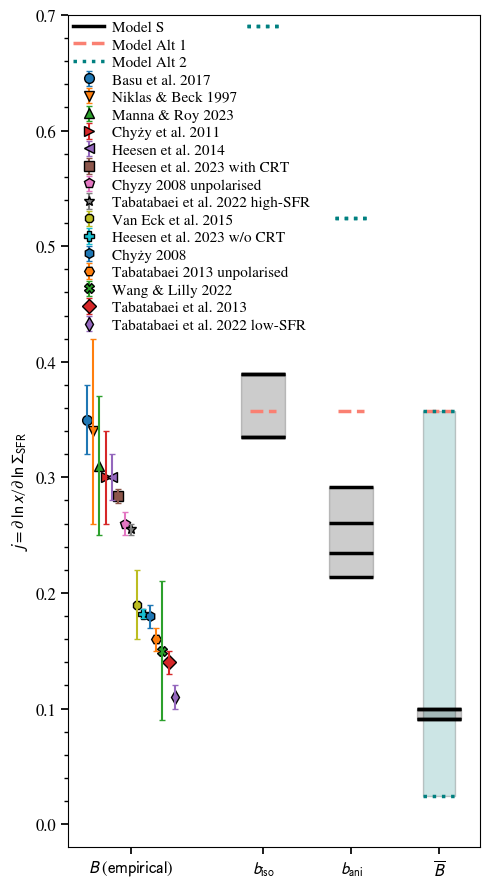

In [12]:

# Sample data
categories = [r'$B \;(\mathrm{empirical})$',r'$b_\mathrm{iso}$', r'$b_\mathrm{ani}$', r'$\overline{B}$']

color_S='k'#'#00FFFF'#'#008080'#'k'
color_1= 'salmon'#'#00FF00'#'#DAA520'#'orange'
color_2= 'teal'#'#FF00FF'#'#800080'#'blue'

ls_1='--'
ls_2= 'dotted'
ls_S= '-'

w1 = 0.15
w2 = 0.18
ws=0.25

lwi = 2.5

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 9), tight_layout=False)

names = ['1','2a','2b','Sa','Sb','Sc','Sd']
quants = []
start = 1
indices = range(start,start+3)
for n in names:
    df = pd.read_csv(f'{n}.csv',  index_col=0)
    df_quants = df_to_quant(df, 'sigmasfr')[:3]
    quants.append(df_quants)
    if n == '1':
        c=color_1
        n= 'Alt '+n
        w = w1
        l = ls_1
    elif n[0] == '2':
        c=color_2
        n= 'Alt '+n
        w = w2
        l = ls_2
    else:
        c=color_S
        w = ws
        l = ls_S
    #ax.scatter(indices, df_quants,color= c,  marker=s,alpha = 0.5)#, label=f'model {n}')
    ax.hlines(df_quants, [x - w for x in indices], [x + w for x in indices],color= c,alpha = 1,linestyles=l,lw = lwi)# label=f'model {n}')


quants=np.array(quants)
quants_max2 = np.max(quants[1:3],axis=0)
quants_min2 = np.min(quants[1:3],axis=0)
quants_maxS = np.max(quants[3:],axis=0)
quants_minS = np.min(quants[3:],axis=0)


for i in indices:
    if quants_max2[i-start]!= quants_min2[i-start]:
        ax.fill_betweenx( [quants_max2[i-start], quants_min2[i-start]],i-w2,i+w2,
                        alpha=0.2, edgecolor='k', facecolor=color_2, interpolate=False)
    if quants_maxS[i-start]!= quants_minS[i-start]:
        ax.fill_betweenx( [quants_maxS[i-start], quants_minS[i-start]],i-ws,i+ws,
                    alpha=0.2, edgecolor='k', facecolor=color_S, interpolate=False)

# Set labels and title
ax.set_ylabel(r'$j = \partial \;\ln x \left/ \partial\; \ln \Sigma_\mathrm{SFR} \right. $', size = axis_textsize, rotation = 90,ha='right')


B     = np.array([0.34,0.30,0.19,0.284,0.182,0.35,0.31,0.255,0.11,0.18,0.30,0.14,0.15])
B_err = np.array([0.08,0.04,0.03,0.006,0.004,0.03,0.06,0.005,0.01,0.01,0.02,0.01,0.06])
# B_obs_names = ['Niklas & Beck (1997)','Chyzy et al. (2011)','Van Eck et al. (2015)','Heesen et al. (2023) without CRT',
#                'Heesen et al. (2023) with CRT',
#                'Basu et al. (2017)','Manna & Roy (2023)','Tabatabaei et al. (2022) high-SFR',
#                'Tabatabaei et al. (2022) low-SFR','Chyzy (2008)','Chyzy (2008) random',
#                'Heesen et al. (2014)', 'Tabatabaei et al. (2013)']
B_names = ['Niklas & Beck 1997','Chyży et al. 2011','Van Eck et al. 2015','Heesen et al. 2023 with CRT',
           'Heesen et al. 2023 w/o CRT', 'Basu et al. 2017','Manna & Roy 2023','Tabatabaei et al. 2022 high-SFR',
               'Tabatabaei et al. 2022 low-SFR','Chyży 2008',
               'Heesen et al. 2014', 'Tabatabaei et al. 2013','Wang & Lilly 2022']
# B_obs_names = ['NB (1997)','C (2011)','V (2015)','H (2023) without CRT',
#                'H (2023) with CRT',
#                'B (2017)','MR (2023)','T (2022) high-SFR',
#                'T (2022) low-SFR','C (2008)','C (2008) random',
#                'H (2014)', 'T (2013)']

b     = np.array([0.26,0.16])
b_err = np.array([0.01,0.01])
b_names = np.array(['Chyzy 2008 unpolarised','Tabatabaei 2013 unpolarised'])

# b,b_err,b_names = ascend(b,b_err,b_names)

B = list(np.append(B,b))
B_err = list(np.append(B_err,b_err))
B_names = list(np.append(B_names,b_names))

B,B_err,B_names = ascend(B,B_err,B_names)

shapes = ['o','v','^','>','<','s','p','*','8','P','h','H','X','D','d']
obs = []
pos = np.linspace(-1,0,len(B_names))
# for i in range(1,b.size+1):
#     pos[-i]=pos[-i]+0.3

for val,err,name,s,p in zip(B,B_err,B_names,shapes,pos):
    a = error_obs(ax, p, val, err,name,s)
    obs.append(a)




legend_elements = [Line2D([0], [0],linestyle=ls_S, color=color_S, lw=lwi, label='Model S'),
                   Line2D([0], [0],linestyle=ls_1, color=color_1,lw=lwi, label='Model Alt 1'),
                   Line2D([0], [0],linestyle=ls_2, color=color_2, lw=lwi, label='Model Alt 2'),
                   ]

                #    Line2D([0], [0], marker='o', color='w', label='Scatter',
                #           markerfacecolor=color_S, markersize=15),
                #    Patch(facecolor='orange', edgecolor=color_1,
                #          label='Color Patch')]

        
leg1 = Legend(ax, handles = legend_elements+obs, labels=['Model S','Model Alt 1','Model Alt 2']+B_names,
             fontsize=lfs, frameon=False, handlelength=2, ncol=1, prop={
            'size': leg_textsize, 'family': 'STIXGeneral'}, fancybox=True, 
            framealpha=0.2, handletextpad=0.5, columnspacing=0.2,labelspacing=0.25,loc = 'upper right', bbox_to_anchor=(0.62, 1.01))
axis_pars(ax)
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.1, box.height])

# leg = Legend(ax, handles = legend_elements, labels=['Model S','Model Alt 1','Model Alt 2'],
#              fontsize=lfs, frameon=True, handlelength=1, ncol=1, prop={
#             'size': leg_textsize, 'family': 'Times New Roman'}, fancybox=True, 
#             framealpha=0.9, handletextpad=0.7, columnspacing=0.7,loc = 'upper right', bbox_to_anchor=(1.01, 1.0))#,bbox_to_anchor=(1, 0.5)
# ax.add_artist(leg)
ax.add_artist(leg1)
# ax.axvline(x=0.5, color='black', linestyle='dotted', alpha = 0.2)

ax.set_ylim(-0.02,0.7)
# Create the figure


# # these are matplotlib.patch.Patch properties
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# # place a text box in upper left in axes coords
# ax.text(0.05, 0.05, 'Observations', transform=ax.transAxes, fontsize=14,
#         verticalalignment='top', bbox=props)

# Set custom names for the x-axis
ax.set_xticks([-0.5]+list(indices),categories)

plt.savefig('magfield_plot.png',dpi=600)

# Display the plot
plt.show()


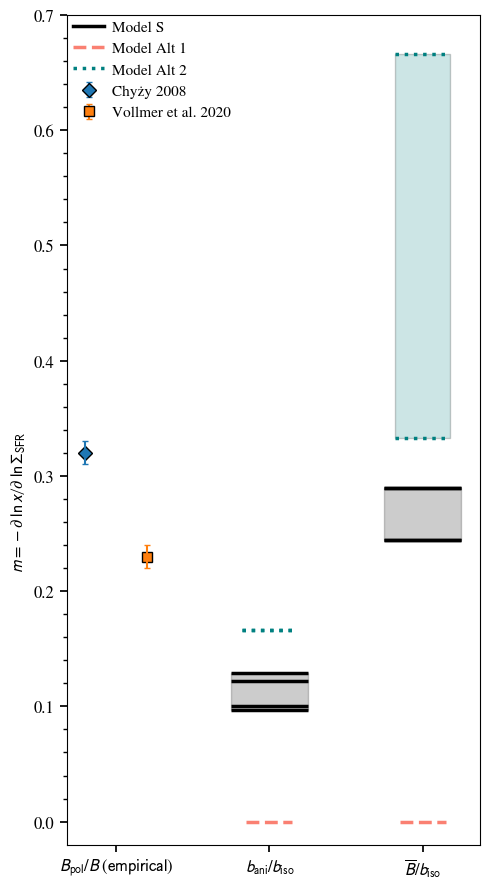

In [6]:

# Sample data
categories = [r'$B_\mathrm{pol}/B \;(\mathrm{empirical})$', r'$b_\mathrm{ani}/b_\mathrm{iso}$',
               r'$\overline{B}/b_\mathrm{iso}$']

# color_S='k'
# color_1= '#ff7f0e'
# color_2= 'blue'

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 9), tight_layout=False)

names = ['1','2a','2b','Sa','Sb','Sc','Sd']
quants = []
indices = range(1,3)
for n in names:
    df = pd.read_csv(f'{n}.csv',  index_col=0)
    df_quants = df_to_quant(df, 'sigmasfr')[3:]
    df_quants = [-d for d in df_quants] # to convert into m
    quants.append(df_quants)
    if n == '1':
        c=color_1
        n= 'Alt '+n
        w = w1
        l = ls_1
    elif n[0] == '2':
        c=color_2
        n= 'Alt '+n
        w = w2
        l = ls_2
    else:
        c=color_S
        w = ws
        l = ls_S
    #ax.scatter(indices, df_quants,color= c,  marker=s,alpha = 0.5)#, label=f'model {n}')
    ax.hlines(df_quants, [x - w for x in indices], [x + w for x in indices],color= c,alpha = 1,linestyles=l,lw = lwi)# label=f'model {n}')


quants=np.array(quants)
quants_max2 = np.max(quants[1:3],axis=0)
quants_min2 = np.min(quants[1:3],axis=0)
quants_maxS = np.max(quants[3:],axis=0)
quants_minS = np.min(quants[3:],axis=0)


for i in indices:
    if quants_max2[i-1]!= quants_min2[i-1]:
        ax.fill_betweenx( [quants_max2[i-1], quants_min2[i-1]],i-w2,i+w2,
                        alpha=0.2, edgecolor='k', facecolor=color_2, interpolate=False)
    if quants_maxS[i-1]!= quants_minS[i-1]:
        ax.fill_betweenx( [quants_maxS[i-1], quants_minS[i-1]],i-ws,i+ws,
                    alpha=0.2, edgecolor='k', facecolor=color_S, interpolate=False)

# Set labels and title
ax.set_ylabel(r'$m = -\partial \;\ln x \left/ \partial\; \ln \Sigma_\mathrm{SFR} \right. $', size = axis_textsize, rotation = 90,ha='right')
# ax.axhline(y=0, color='black', linestyle='--', alpha = 0.2)


babi_obs=[0.32,0.23]#,-0.38,-0.30]
babi_err=[0.01,0.01]#,0.01,0.07]
# babi_names= ['Chyzy (2008)','Volmer et al. (2020)','Gressel et al. (2008a)','Bendre et al. (2015)']
babi_names= ['Chyży 2008','Vollmer et al. 2020']#,'Gressel 08a','Bendre 15']
# babi_names= ['C (2008)','V (2020)','G (2008a)','B (2015)']


df = pd.DataFrame({'val':babi_obs,'err':babi_err,'name':babi_names})
df.sort_values('val',inplace = True,ascending=False)
B_obs = df['val'].values
B_obs_err = df['err'].values
B_obs_names= list(df['name'].values)

shapes = ['D','s']#,'p','*']
obs = []
pos = np.linspace(-0.2,0.2,len(shapes))
for val,err,name,s,p in zip(B_obs,B_obs_err,B_obs_names,shapes,pos):
    a = error_obs(ax, p, val, err,name,s)
    obs.append(a)


# fill_error(ax, 2, 0.18, 0.01,'Chyzy (NGC 4254)(2008) ')
# fill_error(ax, -1, 0.182, 0.004,'Heesen et. al. (2023)')
# fill_error(ax, -1, 0.35, 0.03,'Basu et. al. (2017)')
# fill_error(ax, -1, 0.31, 0.06,'Manna & Roy (2023)')


# fill_error(ax, 5, 0.26, 0.01,'Chyzy (2008)')


legend_elements = [Line2D([0], [0],linestyle=ls_S, color=color_S, lw=lwi, label='Model S'),
                   Line2D([0], [0],linestyle=ls_1, color=color_1,lw=lwi, label='Model Alt 1'),
                   Line2D([0], [0],linestyle=ls_2, color=color_2, lw=lwi, label='Model Alt 2'),
                   ]

                #    Line2D([0], [0], marker='o', color='w', label='Scatter',
                #           markerfacecolor=color_S, markersize=15),
                #    Patch(facecolor='orange', edgecolor=color_1,
                #          label='Color Patch')]

        
leg1 = Legend(ax, handles = legend_elements+obs, labels=['Model S','Model Alt 1','Model Alt 2']+B_obs_names,
             fontsize=lfs, frameon=False, handlelength=2, ncol=1, prop={
            'size': leg_textsize, 'family': 'STIXGeneral'}, fancybox=True, 
            framealpha=0.2, handletextpad=0.5, columnspacing=0.2,loc = 'upper right', bbox_to_anchor=(0.43, 1.01))
axis_pars(ax)
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.1, box.height])

# leg = Legend(ax, handles = legend_elements, labels=['Model S','Model Alt 1','Model Alt 2'],
#              fontsize=lfs, frameon=True, handlelength=1, ncol=1, prop={
#             'size': leg_textsize, 'family': 'Times New Roman'}, fancybox=True, 
#             framealpha=0.9, handletextpad=0.7, columnspacing=0.7,loc = 'upper left', bbox_to_anchor=(0, 1.0))#,bbox_to_anchor=(1, 0.5)
# ax.add_artist(leg)
ax.add_artist(leg1)

# ax.axvline(x=0.5, color='black', linestyle='dotted', alpha = 0.2)
ax.set_ylim(-0.02,0.7)
# Create the figure


# Set custom names for the x-axis
ax.set_xticks([0,1,2],categories)


# Sample data#########################################
 
plt.savefig('ratio_plot.png',dpi=600)

# Display the plot
plt.show()


In [7]:

# # Sample data
# categories = [r'$B (obs)$',r'$b_\mathrm{iso}$', r'$b_\mathrm{ani}$', r'$\bar{B}$', r'$b_\mathrm{ani}/b_\mathrm{iso}$',
#                r'$\bar{B}/b_\mathrm{iso}$', r'$B/b (obs)$']


# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5), tight_layout=True)

# names = ['1','2a','2b','Sa','Sb','Sc','Sd']
# shapes = ['o','v','^','>','1','s','p']
# quants = []
# w = 0.05
# for n,s in zip(names,shapes):
#     df = pd.read_csv(f'{n}.csv',  index_col=0)
#     df_quants = df_to_quant(df, 'sigmasfr')
#     quants.append(df_quants)
#     if n == '1':
#         c='r'
#         n= 'Alt '+n
#         s = 's'
#     elif n[0] == '2':
#         c='b'
#         n= 'Alt '+n
#         s = '_'
#     else:
#         c='g'
#         s= '_'
#     ax.scatter(range(len(df_quants)), df_quants,color= c,  marker=s,alpha = 0.5)#, label=f'model {n}')
#     ax.hlines(df_quants, [x - w for x in range(len(df_quants))], [x + w for x in range(len(df_quants))],color= c,alpha = 1)# label=f'model {n}')


# quants=np.array(quants)
# quants_max2 = np.max(quants[1:3],axis=0)
# quants_min2 = np.min(quants[1:3],axis=0)
# quants_maxS = np.max(quants[3:],axis=0)
# quants_minS = np.min(quants[3:],axis=0)


# for i in range(5):
#     ax.fill_betweenx( [quants_max2[i], quants_min2[i]],i-w,i+w,
#                     alpha=0.2, edgecolor='k', facecolor='b', interpolate=False)
#     ax.fill_betweenx( [quants_maxS[i], quants_minS[i]],i-w,i+w,
#                 alpha=0.2, edgecolor='k', facecolor='g', interpolate=False)

# # Set labels and title
# ax.set_ylabel(r'$\frac{\partial \log(x)}{\partial \log(\Sigma_\mathrm{SFR})}$', size = 12, rotation = 0,ha='right')
# ax.axhline(y=0, color='black', linestyle='--', alpha = 0.2)
# ax.axvline(x=2.5, color='black', linestyle='-', alpha = 0.2)

# B_obs = np.array([0.34,0.30,0.19,0.284,0.35,0.31,0.255,0.11])
# B_obs_err = np.array([0.08,0.04,0.03,0.006,0.03,0.06,0.005,0.01])
# B_obs_names = ['Niklas & Beck (1997)','Chyzy et al(2011)','Van Eck et al. (2015)','Heesen et al. (2023)',
#                'Basu et. al. (2017)','Manna & Roy (2023)','Tabatabaei et al. (2022) high-SFR','Tabatabaei et al. (2022) low-SFR']

# for val,err,name in zip(B_obs,B_obs_err,B_obs_names):
#     error_obs(ax, -1, val, err,name)

# babi_obs=[-0.32,-0.23,-0.38,-0.30]
# babi_err=[0.01,0.01,0.01,0.07]
# babi_names= ['Chyzy (2008)','Volmer et al. (2020)','Gressel et al. (2008a)','Bendre et al. (2015)']
# for val,err,name in zip(babi_obs,babi_err,babi_names):
#     error_obs(ax, 5, val, err,name)
# # fill_error(ax, 2, 0.18, 0.01,'Chyzy (NGC 4254)(2008) ')
# # fill_error(ax, -1, 0.182, 0.004,'Heesen et. al. (2023)')
# # fill_error(ax, -1, 0.35, 0.03,'Basu et. al. (2017)')
# # fill_error(ax, -1, 0.31, 0.06,'Manna & Roy (2023)')


# # fill_error(ax, 5, 0.26, 0.01,'Chyzy (2008)')



# legend_elements = [Line2D([0], [0], color='r', lw=1.5, label='Model Alt 1'),
#                    Line2D([0], [0], color='b', lw=1.5, label='Model Alt 2'),
#                    Line2D([0], [0], color='g', lw=1.5, label='Model S')]

#                 #    Line2D([0], [0], marker='o', color='w', label='Scatter',
#                 #           markerfacecolor='g', markersize=15),
#                 #    Patch(facecolor='orange', edgecolor='r',
#                 #          label='Color Patch')]

        
# ax.legend(fontsize=lfs, frameon=True, handlelength=2, ncol=3, prop={
#             'size': leg_textsize, 'family': 'Times New Roman'}, fancybox=True, framealpha=0.9, handletextpad=0.5, columnspacing=0.7,loc='lower left')



# leg = Legend(ax, handles = legend_elements, labels=['Model Alt 1','Model Alt 2','Model S'],fontsize=lfs, frameon=True, handlelength=4, ncol=1, prop={
#             'size': leg_textsize, 'family': 'Times New Roman'}, fancybox=True, framealpha=0.9, handletextpad=0.7, columnspacing=0.7)
# ax.add_artist(leg)

# axis_pars(ax)

# # Create the figure


# # Set custom names for the x-axis
# ax.set_xticks(range(-1,6),categories)

# plt.savefig('scalingrelplots.png',dpi=600)

# # Display the plot
# plt.show()
